<a href="https://colab.research.google.com/github/sabaafirdous/France-Accidents/blob/main/Null_hypothesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/DS_project_data/all_data.csv', low_memory=False)
data.shape

(3553976, 46)

In [ ]:
data.rename(columns = {'day_of acc':'day_of_acc'}, inplace = True)
data.rename(columns = {' Year_of_birth':'year_of_birth'}, inplace = True)
data.rename(columns = {' Severity_of_the_accident':'severity_of_the_accident'}, inplace = True)
data.rename(columns = {' safety_equipment':'safety_equipment'}, inplace = True)
data.rename(columns = {'day_of acc':'day_of_acc'}, inplace = True)
data.rename(columns = {' Year_of_birth':'year_of_birth'}, inplace = True)
data.rename(columns = {' Severity_of_the_accident':'severity_of_the_accident'}, inplace = True)
data.rename(columns = {' safety_equipment':'safety_equipment'}, inplace = True)
data.rename(columns = {' Type_of_Intersection': 'type_of_intersection'}, inplace=True)
data.rename(columns = {'Longitudinal Profile': 'longitudinal_profile'}, inplace=True)

In [ ]:
data.dropna(how='any', inplace=True)

In [ ]:
df = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [ ]:
df['acc_date'] = df['year_of_acc'].astype(str) + '-' + df['month_of_acc'].astype(str) + '-' + df['day_of_acc'].astype(str)
df.head()

,Accident_ID,year_of_acc,month_of_acc,day_of_acc,acc_tim_in_hour_min,lighting_condition,localisation,type_of_intersection,Atmospheric_conditions,type_of_collision,...,School_point,senc,catagory_veh,occupants_num,obstacles_fixed,obstacle_mobile,shock,maneuver,num_veh_y,acc_date
0,201600000001,2016,2,1,1445,1,2,1,8.0,3.0,...,0.0,0.0,7,0,0.0,0.0,1.0,1.0,B02,2016-2-1
1,201600000001,2016,2,1,1445,1,2,1,8.0,3.0,...,0.0,0.0,2,0,0.0,0.0,7.0,15.0,A01,2016-2-1
2,201600000001,2016,2,1,1445,1,2,1,8.0,3.0,...,0.0,0.0,7,0,0.0,0.0,1.0,1.0,B02,2016-2-1
3,201600000001,2016,2,1,1445,1,2,1,8.0,3.0,...,0.0,0.0,2,0,0.0,0.0,7.0,15.0,A01,2016-2-1
4,201600000002,2016,3,16,1800,1,2,6,1.0,6.0,...,0.0,0.0,7,0,6.0,0.0,1.0,1.0,A01,2016-3-16


In [ ]:
df.shape

(3196732, 46)

In [ ]:
yearly_totals = df.groupby('Accident_ID')['year_of_acc'].sum()

# Convert the result to a dictionary or a list, depending on your preference
yearly_totals_dict = yearly_totals.to_dict()
yearly_totals_list = yearly_totals.tolist()

In [ ]:
print(yearly_totals_dict)  # As a dictionary
print(yearly_totals_list)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Extract the year portion from the "Accidents" column and store it in a new column
df['Year'] = df['Accident_ID'].astype(str).str[:4].astype(int)

# Group the DataFrame by 'Year' and count the number of accidents for each year
yearly_counts = df.groupby('Year')['Accident_ID'].count()

# Print the yearly counts
print(yearly_counts)


Year
2005    344646
2006    331835
2007    342853
2008    321588
2009    285694
2010    265454
2011    244760
2012    221316
2013    208557
2014    216561
2015    211080
2016    202388
Name: Accident_ID, dtype: int64


In [ ]:
# Mark the duplicated rows based on the specified columns
duplicated_rows = df.duplicated(subset=['Accident_ID', 'num_veh_y', 'acc_date'], keep='first')

# Invert the boolean mask to select non-duplicated rows
filtered_df = df[~duplicated_rows]

# Print the filtered DataFrame
filtered_df.head()

,Accident_ID,year_of_acc,month_of_acc,day_of_acc,acc_tim_in_hour_min,lighting_condition,localisation,type_of_intersection,Atmospheric_conditions,type_of_collision,...,School_point,senc,catagory_veh,occupants_num,obstacles_fixed,obstacle_mobile,shock,maneuver,num_veh_y,acc_date
0,201600000001,2016,2,1,1445,1,2,1,8.0,3.0,...,0.0,0.0,7,0,0.0,0.0,1.0,1.0,B02,2016-2-1
1,201600000001,2016,2,1,1445,1,2,1,8.0,3.0,...,0.0,0.0,2,0,0.0,0.0,7.0,15.0,A01,2016-2-1
4,201600000002,2016,3,16,1800,1,2,6,1.0,6.0,...,0.0,0.0,7,0,6.0,0.0,1.0,1.0,A01,2016-3-16
7,201600000003,2016,7,13,1900,1,1,1,1.0,6.0,...,99.0,0.0,7,0,0.0,1.0,6.0,1.0,A01,2016-7-13
9,201600000004,2016,8,15,1930,2,2,1,7.0,3.0,...,99.0,0.0,32,0,0.0,0.0,1.0,1.0,B02,2016-8-15


In [ ]:
filtered_df.shape

(1314745, 46)

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/DS_project_data/FA_Data.csv")

<ipython-input-18-da656f4ca937>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/DS_project_data/FA_Data.csv")


In [ ]:
data.shape

(803932, 48)

In [ ]:
data.columns

Index(['Unnamed: 0', 'Accident_ID', 'year_of_acc', 'month_of_acc',
       'day_of_acc', 'acc_tim_in_hour_min', 'lighting_condition',
       'localisation', 'type_of_intersection', 'Atmospheric_conditions',
       'type_of_collision', 'Municipality', 'Departmeent', 'date', 'place',
       'User_category', 'severity_of_the_accident', 'sex', 'route',
       'safety_equipment', ' Location_of_the_pedestrian',
       ' Action_of_the_pedestrian', 'injured_pedestrian_was_alone_or_no',
       'year_of_birth', 'num_veh_x', 'Category_of_Road', 'Road_Number',
       'Traffic_regime', 'numof_traffic_lanes', 'Reserved_Lane',
       'longitudinal_profile', 'Drawing_in_Plan', 'Central_Solid_Land',
       'Width_assigned_to_vehicle', 'Surface_Condition',
       'Development-Infrastructure', 'Situation_of_Accident', 'School_point',
       'senc', 'catagory_veh', 'occupants_num', 'obstacles_fixed',
       'obstacle_mobile', 'shock', 'maneuver', 'num_veh_y', 'acc_date',
       'Yearly_Count'],
      dtype

                            OLS Regression Results                            
Dep. Variable:           Yearly_Count   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                 3.962e+06
Date:                Thu, 07 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:51:42   Log-Likelihood:            -7.6874e+06
No. Observations:              803932   AIC:                         1.537e+07
Df Residuals:                  803930   BIC:                         1.537e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.579e+06   2266.175   2020.422      

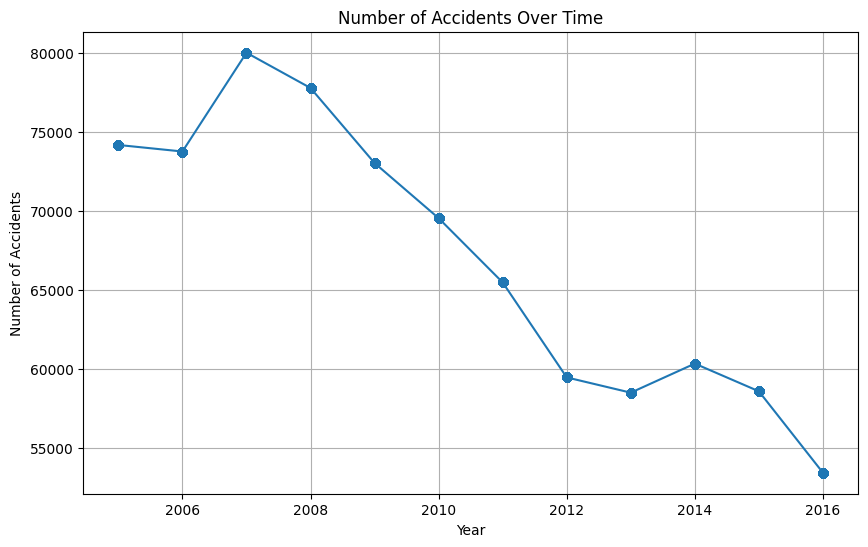

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Visualize the trend
plt.figure(figsize=(10, 6))
plt.plot(data['year_of_acc'], data['Yearly_Count'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents Over Time')
plt.grid(True)

# Perform linear regression
X = sm.add_constant(data['year_of_acc'])  # Add a constant term to the model
y = data['Yearly_Count']
model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())

In [ ]:
import pandas as pd

# Data
Years = [2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005]
Accidents_in_each_year = [53414, 58569, 60322, 58482, 59448, 65461, 69529, 73018, 77771, 80004, 73750, 74164]

# Create a DataFrame with future years you want to predict for
future_years = [2017, 2018, 2019, 2020]
future_data = {'Year': future_years}
future_df = pd.DataFrame(future_data)

# Coefficients from the linear regression model
intercept = 4.593e+06
year_coefficient = -2251.3147

# Calculate predictions for the future years
future_df['Predicted_Accidents'] = (intercept + future_df['Year'] * year_coefficient).astype(int)

# Print the predictions
print(future_df)


   Year  Predicted_Accidents
0  2017                52098
1  2018                49846
2  2019                47595
3  2020                45344


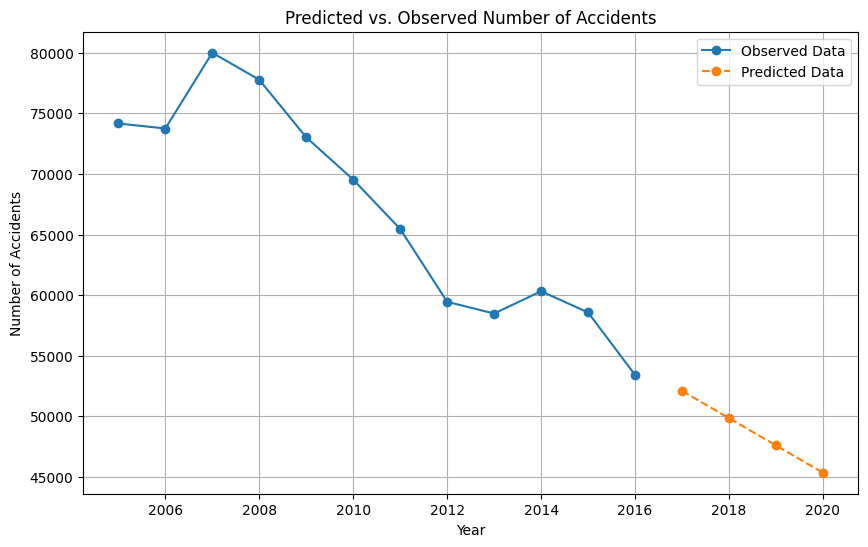

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(Years, Accidents_in_each_year, label='Observed Data', marker='o', linestyle='-')
plt.plot(future_df['Year'], future_df['Predicted_Accidents'], label='Predicted Data', marker='o', linestyle='--')
plt.title('Predicted vs. Observed Number of Accidents')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid(True)
plt.show()